In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# Import dataset
file_path = Path('Resources/vgsales-12-4-2019.csv')
vgsales_df = pd.read_csv(file_path)
vgsales_df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [3]:
vgsales_df.columns.tolist()

['Rank',
 'Name',
 'basename',
 'Genre',
 'ESRB_Rating',
 'Platform',
 'Publisher',
 'Developer',
 'VGChartz_Score',
 'Critic_Score',
 'User_Score',
 'Total_Shipped',
 'Global_Sales',
 'NA_Sales',
 'PAL_Sales',
 'JP_Sales',
 'Other_Sales',
 'Year',
 'Last_Update',
 'url',
 'status',
 'Vgchartzscore',
 'img_url']

In [4]:
vgsales_df.dtypes

Rank                int64
Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
PAL_Sales         float64
JP_Sales          float64
Other_Sales       float64
Year              float64
Last_Update        object
url                object
status              int64
Vgchartzscore     float64
img_url            object
dtype: object

In [5]:
# Dropping columns:
# Rank: still a rough draft
# Other data has been drop as it is irrelevant to our presentation
vg_global_sales_df = vgsales_df.drop(['Rank', 'Last_Update', 
                                   'status', 'VGChartz_Score','Vgchartzscore',
                                    'User_Score','NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'url', 'img_url', 'basename'], axis = 1)
vg_global_sales_df.head(5)

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,Year
0,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86,NaN,2006.0
1,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,40.24,NaN,1985.0
2,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,36.60,NaN,2017.0
4,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09,NaN,2009.0


In [6]:
vg_global_sales_df.count()

Name             55792
Genre            55792
ESRB_Rating      23623
Platform         55792
Publisher        55792
Developer        55775
Critic_Score      6536
Total_Shipped     1827
Global_Sales     19415
Year             54813
dtype: int64

In [7]:
# Find the null values
for column in vg_global_sales_df.columns:
    print(f'Column {column} has {vg_global_sales_df[column].isnull().sum()} null values')

Column Name has 0 null values
Column Genre has 0 null values
Column ESRB_Rating has 32169 null values
Column Platform has 0 null values
Column Publisher has 0 null values
Column Developer has 17 null values
Column Critic_Score has 49256 null values
Column Total_Shipped has 53965 null values
Column Global_Sales has 36377 null values
Column Year has 979 null values


In [8]:
vg_global_sales_df.head()

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,Year
0,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86,NaN,2006.0
1,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,40.24,NaN,1985.0
2,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,36.60,NaN,2017.0
4,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09,NaN,2009.0


In [9]:
vg_global_sales_df.shape

(55792, 10)

In [10]:
# Filter and use only data since 2000
vg_global_sales_df = vg_global_sales_df[vg_global_sales_df['Year'] >= 2000]
vg_global_sales_df.shape

(42368, 10)

In [11]:
# Calculating the total Global Sales
vg_total_global_sales = vg_global_sales_df['Global_Sales'].sum()
print(vg_total_global_sales)

6234.29


# Analyzing Global Sales by Publisher, Developer, Game, Genre

### Developers create the games, while publishers market, sell, and promote them. This is the main difference between developers and publishers.

## Global Sales by Publisher

In [12]:
# Count the distinct values of Publisher
vg_global_sales_df['Publisher'].nunique()

2665

In [13]:
# Grouping Publisher and Sum
vg_global_sales_by_Publisher_df = vg_global_sales_df.groupby('Publisher')[['Global_Sales']].sum()
vg_global_sales_by_Publisher_df.head()

,Global_Sales
Publisher,
100 Gates,0.00
10TACLE Studios,0.48
10tons,0.00
10tons Ltd,0.00
11 bit studios,0.04


In [24]:
# Percentage of Global Sales
vg_global_sales_by_Publisher_df ["Percentage of Global_Sales"] = vg_global_sales_by_Publisher_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_Publisher_df.head()

,Global_Sales,Percentage of Global_Sales
Publisher,,
100 Gates,0.00,0.000000
10TACLE Studios,0.48,0.000077
10tons,0.00,0.000000
10tons Ltd,0.00,0.000000
11 bit studios,0.04,0.000006


In [15]:
vg_global_sales_by_Publisher_df.columns

Index(['Global_Sales', 'Percentage of Global_Sales'], dtype='object')

In [17]:
vg_global_sales_by_top10_Publisher_df = vg_global_sales_by_Publisher_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Publisher_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Publisher_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Publisher_df.index)

vg_global_sales_by_top10_Publisher_df

,Global_Sales,Percentage of Global_Sales
Publisher,,
Activision,687.92,11.03%
Electronic Arts,617.15,9.90%
Ubisoft,473.24,7.59%
EA Sports,453.64,7.28%
Sony Computer Entertainment,333.05,5.34%
THQ,319.10,5.12%
Rockstar Games,236.27,3.79%
Konami,207.15,3.32%
Sega,176.56,2.83%


In [18]:
vg_global_sales_by_top10_Publisher_df.columns

Index(['Global_Sales', 'Percentage of Global_Sales'], dtype='object')

In [19]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Global Sales (in millions) by Publisher'}, xlabel='Publisher'>

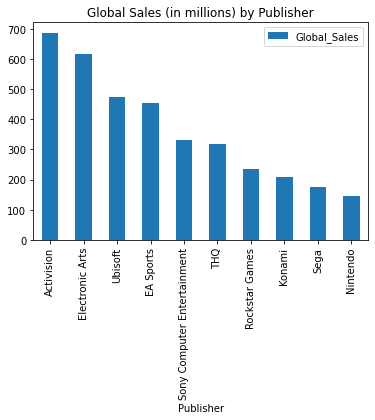

In [21]:
# Build bar chart
vg_global_sales_by_top10_Publisher_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Publisher")

# Global Sales by Developer

In [22]:
# Count the distinct values of Developer
vg_global_sales_df['Developer'].nunique()

6593

In [23]:
# Grouping Developer and Sum
vg_global_sales_by_Developer_df = vg_global_sales_df.groupby('Developer')[['Global_Sales']].sum()
vg_global_sales_by_Developer_df.head()

,Global_Sales
Developer,
.theprodukkt,0.00
07th Expansion,0.20
0verflow,0.02
10Tacle Studios Belgium,0.00
10tacle Studios AG,0.19


In [26]:
# Percentage of the Global Sales
vg_global_sales_by_Developer_df ["Percentage of Global_Sales"] = vg_global_sales_by_Developer_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_top10_Developer_df = vg_global_sales_by_Developer_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Developer_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Developer_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Developer_df.index)

vg_global_sales_by_top10_Developer_df

,Global_Sales,Percentage of Global_Sales
Developer,,
EA Canada,260.17,4.17%
EA Tiburon,176.47,2.83%
Ubisoft Montreal,172.96,2.77%
Treyarch,146.96,2.36%
Traveller's Tales,143.12,2.30%
Infinity Ward,118.97,1.91%
Rockstar North,116.91,1.88%
Visual Concepts,95.82,1.54%
Konami,87.90,1.41%


<AxesSubplot:title={'center':'Global Sales (in millions) by Developer'}, xlabel='Developer'>

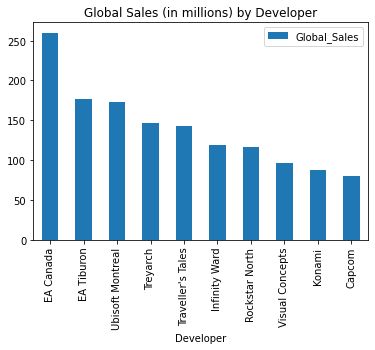

In [35]:
# Build bar chart
vg_global_sales_by_top10_Developer_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Developer")

# Global Sales by Genre

In [28]:
# Count the distinct values of Developer
vg_global_sales_df['Genre'].nunique()

20

In [29]:
# Grouping Developer and Sum
vg_global_sales_by_Genre_df = vg_global_sales_df.groupby('Genre')[['Global_Sales']].sum()
vg_global_sales_by_Genre_df.head()

,Global_Sales
Genre,
Action,1104.93
Action-Adventure,155.45
Adventure,306.30
Board Game,0.31
Education,0.09


In [30]:
# Percentage of the Global Sales
vg_global_sales_by_Genre_df ["Percentage of Global_Sales"] = vg_global_sales_by_Genre_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_top10_Genre_df = vg_global_sales_by_Genre_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Genre_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Genre_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Genre_df.index)

vg_global_sales_by_top10_Genre_df

,Global_Sales,Percentage of Global_Sales
Genre,,
Action,1104.93,17.72%
Sports,1078.46,17.30%
Shooter,962.26,15.43%
Misc,551.59,8.85%
Racing,461.95,7.41%
Role-Playing,457.47,7.34%
Platform,323.45,5.19%
Adventure,306.30,4.91%
Simulation,286.97,4.60%


<AxesSubplot:title={'center':'Global Sales (in millions) by Genre'}, xlabel='Genre'>

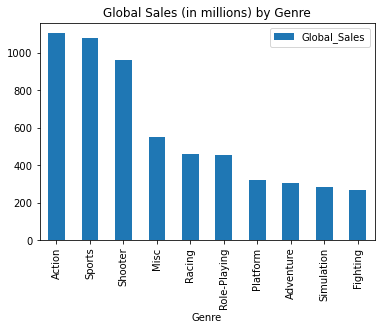

In [31]:
# Build bar chart
vg_global_sales_by_top10_Genre_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Genre")

# Top 10 Games with Highest Global Sales

In [32]:
# Grouping Genre and Sum
vg_global_sales_by_Game_df = vg_global_sales_df.groupby('Name')[['Global_Sales']].sum()
vg_global_sales_by_Game_df.head()

,Global_Sales
Name,
#IDARB,0.0
#killallzombies,0.0
'Splosion Man,0.0
(c-12) Final Resistance,0.0
.deTuned,0.0


In [33]:
# Percentage of Global Sales
vg_global_sales_by_Game_df ["Percentage of Global_Sales"] = vg_global_sales_by_Game_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_top10_Game_df = vg_global_sales_by_Game_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Game_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Game_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Game_df.index)

vg_global_sales_by_top10_Game_df

,Global_Sales,Percentage of Global_Sales
Name,,
Grand Theft Auto V,64.29,1.03%
Call of Duty: Black Ops,30.99,0.50%
Call of Duty: Modern Warfare 3,30.71,0.49%
Call of Duty: Black Ops II,29.59,0.47%
Call of Duty: Ghosts,28.80,0.46%
Call of Duty: Black Ops 3,26.72,0.43%
Call of Duty: Modern Warfare 2,25.02,0.40%
Minecraft,24.01,0.39%
Grand Theft Auto IV,22.53,0.36%


<AxesSubplot:title={'center':'Global Sales (in millions) by Game'}, xlabel='Name'>

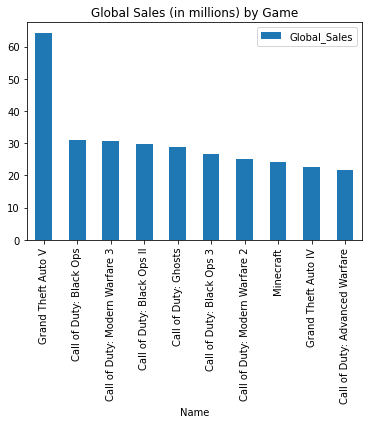

In [34]:
# Build bar chart
vg_global_sales_by_top10_Game_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Game")

# List of Genres

In [36]:
vg_global_sales_df['Genre'].unique()

array(['Sports', 'Racing', 'Shooter', 'Platform', 'Misc', 'Party',
       'Simulation', 'Role-Playing', 'Action', 'Action-Adventure',
       'Fighting', 'Strategy', 'Adventure', 'Music', 'MMO', 'Puzzle',
       'Sandbox', 'Visual Novel', 'Board Game', 'Education'], dtype=object)